## Naive Bayes
- 数据集
$$sklearn.datasets.make\_blobs$$
- 输出
$$P(Y=1|x)=\frac{exp(\omega \cdot x+b)}{1+exp(\omega \cdot x+b)}$$
$$P(Y=0|x)=\frac{1}{1+exp(\omega \cdot x+b)}$$
- 损失函数 
$$P(Y=1|x)=\pi(x),P(Y=0|x)=1-\pi(x),y_i \in \{0,1\}$$
$$L(\omega)=-\sum\limits_{i=1}^N [y_ilog\pi(x_i)+(1-y_i)log(1-\pi(x_i)]$$
- 参数变化 
$$\nabla_\omega L(\omega,b)=\sum\limits_{i=1}^N (\sigma(\omega \cdot x)-y_i)*x$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

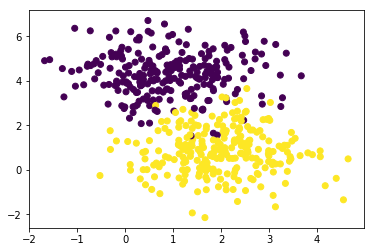

In [2]:
X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=0)
tmp=np.ones((X.shape[0],1))                   //[x,1 b] -> w*x
X=np.append(X,tmp,axis=1)
plt.scatter(X[:,0],X[:,1],c=Y)
Train_x,Val_x,Train_y,Val_y=train_test_split(X,Y,test_size=0.2)

In [15]:
class Logistic_regression():
    def __init__(self,n_feature):
        self.lr=0.05
        self.epoch=200
        self.W=np.random.random(n_feature)
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def fit(self,X,Y):
        for i in range(self.epoch):
            u=np.random.randint(X.shape[0])
            y=self.sigmoid(np.dot(self.W,X[u]))
            self.W=self.W+self.lr*(Y[u]-y)*X[u]
        
    def predict(self,X):
        Y=np.dot(X,self.W)
        Y[Y>=0],Y[Y<0]=1,0
        return Y

In [16]:
def show(clf,X,Y):
    plt.scatter(X[:,0],X[:,1],c=Y)
    x=np.arange(-1,5).reshape(-1,1)
    y=((-clf.W[0]/clf.W[1])*x+(-clf.W[2]/clf.W[1])).reshape(-1,1)
    plt.plot(x,y)

After Train,Acc: 93.250000%


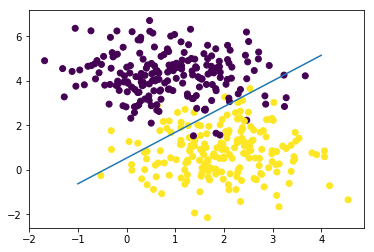

In [17]:
n_feature=Train_x.shape[1]
clf=Logistic_regression(n_feature)
clf.fit(Train_x,Train_y)

Y=clf.predict(Train_x)
print("After Train,Acc: %lf%%"%(sum(Y==Train_y)/len(Train_x)*100))
show(clf,Train_x,Train_y)

In [18]:
Y=clf.predict(Val_x)
print("Val acc %lf%%"%(sum(Y==Val_y)/len(Val_x)*100))

Val acc 94.000000%
